In [1]:
#load the labraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
df = pd.read_csv("kaggle_diabetes.csv")

#To show first 5 record
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
#Delecting unwanted column from our dataset
df.drop("Age",axis=1,inplace=True)

In [4]:
#To check the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [5]:
#Cross check with datatypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Outcome                       int64
dtype: object

In [6]:
#To check the ducpicated value in our dataset
df.duplicated().sum()

1256

In [7]:
#To show number of rows and columns
df.shape

(2000, 8)

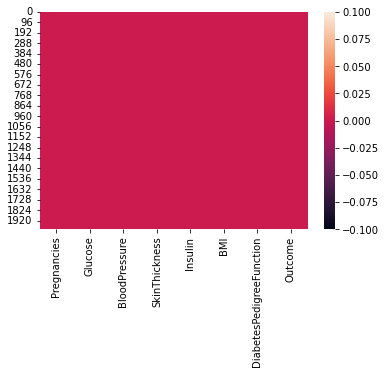

In [8]:
#visualize the null value 
sb.heatmap(df.isnull())
plt.show()

0    1316
1     684
Name: Outcome, dtype: int64


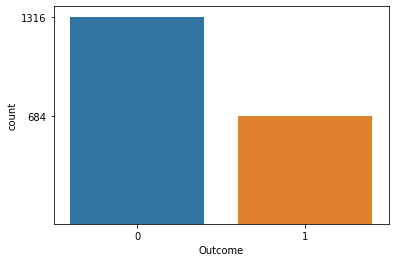

In [9]:
#To check the dataset is balance or unbalance
#Here our target is Outcome 
#Condition: if Outcome is 1 the person has the diabetes or if 0 the person has no diabetes
f = df["Outcome"].value_counts()
print(f)

sb.countplot(data=df,x="Outcome")
plt.yticks(f)
plt.show()

In [10]:
#The given dataset is balance dataset.

In [11]:
#Select the input and output
x = df.drop("Outcome",axis=1)   #input
y = df["Outcome"]   #output

In [12]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,2,138,62,35,0,33.6,0.127
1,0,84,82,31,125,38.2,0.233
2,0,145,0,0,0,44.2,0.630
3,0,135,68,42,250,42.3,0.365
4,1,139,62,41,480,40.7,0.536


In [13]:
#Split the dataset into 70-30 % by train test split class
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [14]:
x_train.shape , x_test.shape

((1400, 7), (600, 7))

In [15]:
y_train.shape , y_test.shape

((1400,), (600,))

In [16]:
#Applying Standard Scaler on our dataset to convert into a numpy array
from sklearn.preprocessing import StandardScaler

In [17]:
#create an object for StandardScaler class
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [18]:
#create user define function
def create_model(model):
    model.fit(x_train,y_train) #train the model with 70% data
    y_pred = model.predict(x_test)  #model test with 30% data
    
    #generate Report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    
    return model

In [19]:
#call the class
from sklearn.metrics import classification_report , confusion_matrix

In [20]:
#1. Performing Base Model means Linear regression
from sklearn.linear_model import LogisticRegression

In [21]:
#create an object for LinearRegression class
lr = LogisticRegression()

#call the function
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       404
           1       0.71      0.60      0.65       196

    accuracy                           0.79       600
   macro avg       0.76      0.74      0.75       600
weighted avg       0.78      0.79      0.78       600

[[355  49]
 [ 78 118]]


In [22]:
#2. Classification Model : Decision Forest Classification
#call the inbuilt class
from sklearn.tree import DecisionTreeClassifier

In [23]:
#create an object for DecisionTreeClassifier class
dtc = DecisionTreeClassifier(random_state=1)  #by default GINI Index

#call function
dtc = create_model(dtc)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       404
           1       0.94      0.94      0.94       196

    accuracy                           0.96       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.96      0.96      0.96       600

[[392  12]
 [ 12 184]]


In [24]:
#Create Information Gain
dict1 = {"Input":x.columns,"IG":dtc.feature_importances_}
df2 = pd.DataFrame(dict1)
df2.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.341456
1,BMI,0.215926
2,DiabetesPedigreeFunction,0.143296
3,Pregnancies,0.088965
4,BloodPressure,0.088803
5,Insulin,0.080236
6,SkinThickness,0.041317


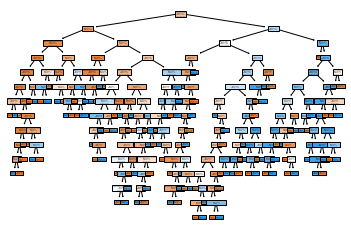

In [25]:
#Drow a tree 
from sklearn import tree

#plt.figure(figsize=(30,30))
f = x.columns
_ = tree.plot_tree(dtc,feature_names=f,filled=True)
plt.show()

In [27]:
#We get recall score 0.94(94%) which is good , but we can do better
#So we apply pruning technique on DecisionTreeClassifier. There are 2 types of pruning tech.
#1.Max Depth : between >=1 to <=8 we apply for-loop
for i in range(1,9):
    #create an object for DecisionTreeClassifier class with max_depth
    dtc1 = DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Max Depth:",i)
    #call the function
    dtc1 = create_model(dtc1)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       404
           1       0.58      0.68      0.62       196

    accuracy                           0.73       600
   macro avg       0.70      0.72      0.71       600
weighted avg       0.75      0.73      0.74       600

[[305  99]
 [ 62 134]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       404
           1       0.74      0.39      0.51       196

    accuracy                           0.76       600
   macro avg       0.75      0.66      0.68       600
weighted avg       0.75      0.76      0.73       600

[[377  27]
 [119  77]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       404
           1       0.67      0.65      0.66       196

    accuracy                           0.78       600
   macro avg       0.75      0.75      0.75

In [28]:
#got the best score at 8
dtc1 = DecisionTreeClassifier(random_state=1,max_depth=8)
#call the function
dtc1 = create_model(dtc1)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       404
           1       0.82      0.82      0.82       196

    accuracy                           0.88       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.88      0.88      0.88       600

[[368  36]
 [ 36 160]]


In [29]:
#Create Information Gain
dict2 = {"Input":x.columns,"IG":dtc1.feature_importances_}
df3 = pd.DataFrame(dict2)
df3.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.398938
1,BMI,0.205352
2,DiabetesPedigreeFunction,0.116131
3,Pregnancies,0.097225
4,Insulin,0.070877
5,BloodPressure,0.065083
6,SkinThickness,0.046393


In [31]:
#2.Mim Sample Leaf : between >=45 to <=100, so apply for-loop
for i in range(45,101):
    #create an object for DecisionTreeClassifier class with min_samples_leaf
    dtc2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("Min Sample Leaf:",i)
    #call the function
    dtc2 = create_model(dtc2)

Min Sample Leaf: 45
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       404
           1       0.67      0.65      0.66       196

    accuracy                           0.78       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.78      0.78      0.78       600

[[342  62]
 [ 68 128]]
Min Sample Leaf: 46
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       404
           1       0.67      0.65      0.66       196

    accuracy                           0.78       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.78      0.78      0.78       600

[[342  62]
 [ 68 128]]
Min Sample Leaf: 47
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       404
           1       0.67      0.65      0.66       196

    accuracy                           0.78       600
   macro avg       0.7

[[359  45]
 [ 72 124]]
Min Sample Leaf: 68
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       404
           1       0.73      0.63      0.68       196

    accuracy                           0.81       600
   macro avg       0.78      0.76      0.77       600
weighted avg       0.80      0.81      0.80       600

[[359  45]
 [ 72 124]]
Min Sample Leaf: 69
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       404
           1       0.73      0.63      0.68       196

    accuracy                           0.81       600
   macro avg       0.78      0.76      0.77       600
weighted avg       0.80      0.81      0.80       600

[[359  45]
 [ 72 124]]
Min Sample Leaf: 70
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       404
           1       0.73      0.63      0.68       196

    accuracy                           0.81       600

[[336  68]
 [ 61 135]]
Min Sample Leaf: 95
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       404
           1       0.67      0.69      0.68       196

    accuracy                           0.79       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.79      0.79      0.79       600

[[336  68]
 [ 61 135]]
Min Sample Leaf: 96
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       404
           1       0.66      0.68      0.67       196

    accuracy                           0.78       600
   macro avg       0.75      0.76      0.75       600
weighted avg       0.78      0.78      0.78       600

[[336  68]
 [ 63 133]]
Min Sample Leaf: 97
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       404
           1       0.62      0.79      0.69       196

    accuracy                           0.77       600

In [32]:
#Got the best score at 97
dtc2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=97)
#call function
dtc2 = create_model(dtc2)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       404
           1       0.62      0.79      0.69       196

    accuracy                           0.77       600
   macro avg       0.75      0.78      0.76       600
weighted avg       0.80      0.77      0.78       600

[[308  96]
 [ 41 155]]


In [33]:
#Create Information Gain
dict3 = {"Input":x.columns,"IG":dtc2.feature_importances_}
df4 = pd.DataFrame(dict3)
df4.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.743106
1,BMI,0.184024
2,Pregnancies,0.059875
3,DiabetesPedigreeFunction,0.007461
4,Insulin,0.005533
5,BloodPressure,0.000000
6,SkinThickness,0.000000


In [34]:
#2. Applying Decision Tree with Entropy Index
#create an object for DecisionTreeClassifier class with Entropy index
dtc_entropy = DecisionTreeClassifier(random_state=1,criterion='entropy')
#call the function
dtc_entropy = create_model(dtc_entropy)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       404
           1       0.92      0.95      0.93       196

    accuracy                           0.96       600
   macro avg       0.95      0.96      0.95       600
weighted avg       0.96      0.96      0.96       600

[[387  17]
 [  9 187]]


In [ ]:
#Got the recall score 0.95(95%) on Decision Tree classifier 

In [35]:
#Create Information Gain
dict4 = {"Input":x.columns,"IG":dtc_entropy.feature_importances_}
df5 = pd.DataFrame(dict4)
df5.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.295656
1,BMI,0.227256
2,DiabetesPedigreeFunction,0.127263
3,Pregnancies,0.104600
4,BloodPressure,0.088460
5,Insulin,0.084155
6,SkinThickness,0.072610


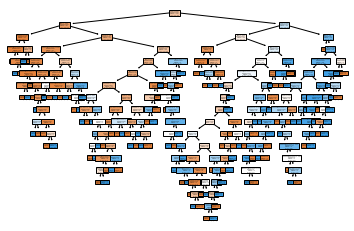

In [36]:
#Draw a tree

f = x.columns
_ = tree.plot_tree(dtc_entropy,feature_names=f,filled=True)
plt.show()

In [37]:
#Now apply Pruning technique on DecisionTreeClassifier with entropy index
#1.max_depth on entropy index : between >=1 to <=8 aplly for-loop
#create an object for DecisionTreeClassifier class 
for i in range(1,9):
    dtc_entropy1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    print("Max Depth:",i)
    #call function
    dtc_entropy1 = create_model(dtc_entropy1)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       404
           1       0.54      0.73      0.62       196

    accuracy                           0.71       600
   macro avg       0.69      0.72      0.69       600
weighted avg       0.75      0.71      0.72       600

[[282 122]
 [ 52 144]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       404
           1       0.74      0.39      0.51       196

    accuracy                           0.76       600
   macro avg       0.75      0.66      0.68       600
weighted avg       0.75      0.76      0.73       600

[[377  27]
 [119  77]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       404
           1       0.59      0.71      0.65       196

    accuracy                           0.75       600
   macro avg       0.72      0.74      0.73

In [38]:
#we got best score at 5
dtc_entropy1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=5)
#call function
dtc_entropy1 = create_model(dtc_entropy1)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       404
           1       0.61      0.80      0.69       196

    accuracy                           0.77       600
   macro avg       0.75      0.77      0.75       600
weighted avg       0.79      0.77      0.77       600

[[304 100]
 [ 40 156]]


In [39]:
#Create Information Gain
dict5 = {"Input":x.columns,"IG":dtc_entropy1.feature_importances_}
df6 = pd.DataFrame(dict5)
df6.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.496207
1,BMI,0.236714
2,Pregnancies,0.109594
3,DiabetesPedigreeFunction,0.096041
4,Insulin,0.036625
5,SkinThickness,0.024820
6,BloodPressure,0.000000


In [40]:
#2.Pruning tech. min_samples_leaf : between >=45 to <=100 we apply for-loop
for i in range(45,101):
    dtc_entropy2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    print("Min Samples Leaf:",i)
    #call function
    dtc_entropy2 = create_model(dtc_entropy2)

Min Samples Leaf: 45
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       404
           1       0.69      0.63      0.66       196

    accuracy                           0.79       600
   macro avg       0.76      0.74      0.75       600
weighted avg       0.78      0.79      0.78       600

[[348  56]
 [ 73 123]]
Min Samples Leaf: 46
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       404
           1       0.72      0.56      0.63       196

    accuracy                           0.79       600
   macro avg       0.76      0.73      0.74       600
weighted avg       0.78      0.79      0.78       600

[[362  42]
 [ 87 109]]
Min Samples Leaf: 47
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       404
           1       0.71      0.58      0.64       196

    accuracy                           0.79       600
   macro avg       

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       404
           1       0.70      0.59      0.64       196

    accuracy                           0.78       600
   macro avg       0.76      0.73      0.74       600
weighted avg       0.78      0.78      0.78       600

[[355  49]
 [ 81 115]]
Min Samples Leaf: 70
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       404
           1       0.70      0.59      0.64       196

    accuracy                           0.78       600
   macro avg       0.76      0.73      0.74       600
weighted avg       0.78      0.78      0.78       600

[[355  49]
 [ 81 115]]
Min Samples Leaf: 71
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       404
           1       0.70      0.59      0.64       196

    accuracy                           0.78       600
   macro avg       0.76      0.73      0

In [41]:
#got good score at 74
dtc_entropy2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=74)
#call function
dtc_entropy2 = create_model(dtc_entropy2)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       404
           1       0.67      0.71      0.69       196

    accuracy                           0.79       600
   macro avg       0.76      0.77      0.76       600
weighted avg       0.79      0.79      0.79       600

[[335  69]
 [ 57 139]]


In [42]:
#Create Information Gain
dict6 = {"Input":x.columns,"IG":dtc_entropy2.feature_importances_}
df7 = pd.DataFrame(dict6)
df7.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.682007
1,BMI,0.208931
2,Pregnancies,0.079358
3,DiabetesPedigreeFunction,0.017622
4,Insulin,0.012082
5,BloodPressure,0.000000
6,SkinThickness,0.000000


In [43]:
#2nd classification is Random Forest classifier by default it takes GINI Index
from sklearn.ensemble import RandomForestClassifier

In [44]:
#create an object for RandomForestClassifier class
#it takes n_estimators means number of Iteration means no. of Decision tree
#n_estimators take >=10 and <=100
for i in range(10,101):
    rfc = RandomForestClassifier(n_estimators=i,random_state=1)
    print("No. of Estimators:",i)
    #call function
    rfc = create_model(rfc)


No. of Estimators: 10
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.94      0.96      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.96      0.97       600

[[391  13]
 [  8 188]]
No. of Estimators: 11
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.94      0.96      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.96      0.97       600

[[391  13]
 [  8 188]]
No. of Estimators: 12
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.94      0.95      0.95       196

    accuracy                           0.96       600
   macro avg    

[[390  14]
 [  4 192]]
No. of Estimators: 33
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       404
           1       0.92      0.98      0.95       196

    accuracy                           0.97       600
   macro avg       0.96      0.97      0.96       600
weighted avg       0.97      0.97      0.97       600

[[388  16]
 [  4 192]]
No. of Estimators: 34
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       404
           1       0.92      0.98      0.95       196

    accuracy                           0.97       600
   macro avg       0.96      0.97      0.96       600
weighted avg       0.97      0.97      0.97       600

[[388  16]
 [  4 192]]
No. of Estimators: 35
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       404
           1       0.92      0.98      0.95       196

    accuracy                           0.97    

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.93      0.97      0.95       196

    accuracy                           0.97       600
   macro avg       0.96      0.97      0.96       600
weighted avg       0.97      0.97      0.97       600

[[390  14]
 [  6 190]]
No. of Estimators: 56
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.93      0.97      0.95       196

    accuracy                           0.97       600
   macro avg       0.96      0.97      0.96       600
weighted avg       0.97      0.97      0.97       600

[[390  14]
 [  6 190]]
No. of Estimators: 57
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.93      0.97      0.95       196

    accuracy                           0.97       600
   macro avg       0.96      0.97     

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.94      0.95      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.96      0.97       600

[[392  12]
 [  9 187]]
No. of Estimators: 79
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.94      0.95      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.96      0.97       600

[[392  12]
 [  9 187]]
No. of Estimators: 80
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.94      0.95      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96     

In [45]:
#Got best score at 10
rfc = RandomForestClassifier(n_estimators=10,random_state=1)
#call function
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       404
           1       0.94      0.96      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.96      0.97       600

[[391  13]
 [  8 188]]


In [46]:
#Create Information Gain
dict7 = {"Input":x.columns,"IG":rfc.feature_importances_}
df8 = pd.DataFrame(dict7)
df8.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.278362
1,BMI,0.177534
2,DiabetesPedigreeFunction,0.160665
3,Pregnancies,0.116945
4,BloodPressure,0.097770
5,Insulin,0.085571
6,SkinThickness,0.083152


In [47]:
#Got the best recall score of 0.96(96%) which is best score
#Now apply pruning technique on RandomForestClassifier class
#1.Max Depth : between >=1 to <=8 apply for-loop
for i in range(1,9):
    rfc1 = RandomForestClassifier(n_estimators=10,random_state=1,max_depth=i)
    print("Max Depth:",i)
    #call function
    rfc1 = create_model(rfc1)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.69      0.99      0.82       404
           1       0.86      0.10      0.17       196

    accuracy                           0.70       600
   macro avg       0.78      0.54      0.50       600
weighted avg       0.75      0.70      0.61       600

[[401   3]
 [177  19]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.72      0.96      0.83       404
           1       0.76      0.24      0.36       196

    accuracy                           0.73       600
   macro avg       0.74      0.60      0.60       600
weighted avg       0.73      0.73      0.68       600

[[389  15]
 [149  47]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       404
           1       0.78      0.41      0.54       196

    accuracy                           0.77       600
   macro avg       0.77      0.68      0.69

In [48]:
#Got the good score at 8
rfc1 = RandomForestClassifier(n_estimators=10,random_state=1,max_depth=8)
#call function
rfc1 = create_model(rfc1)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       404
           1       0.88      0.79      0.83       196

    accuracy                           0.90       600
   macro avg       0.89      0.87      0.88       600
weighted avg       0.89      0.90      0.89       600

[[382  22]
 [ 41 155]]


In [49]:
#Create Information Gain
dict8 = {"Input":x.columns,"IG":rfc1.feature_importances_}
df9 = pd.DataFrame(dict8)
df9.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.276148
1,BMI,0.192997
2,DiabetesPedigreeFunction,0.147495
3,Pregnancies,0.114918
4,Insulin,0.095637
5,SkinThickness,0.086641
6,BloodPressure,0.086164


In [50]:
#Applying 2nd pruning technique Min Samples Leaf between >=45 to <=100 apply for-loop
for i in range(45,101):
    rfc2 = RandomForestClassifier(n_estimators=10,random_state=1,min_samples_leaf=i)
    print("Min Samples Leaf:",i)
    #call function
    rfc2 = create_model(rfc2)

Min Samples Leaf: 45
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       404
           1       0.71      0.61      0.65       196

    accuracy                           0.79       600
   macro avg       0.77      0.74      0.75       600
weighted avg       0.78      0.79      0.79       600

[[355  49]
 [ 77 119]]
Min Samples Leaf: 46
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       404
           1       0.70      0.60      0.64       196

    accuracy                           0.78       600
   macro avg       0.76      0.74      0.74       600
weighted avg       0.78      0.78      0.78       600

[[353  51]
 [ 79 117]]
Min Samples Leaf: 47
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       404
           1       0.69      0.57      0.62       196

    accuracy                           0.78       600
   macro avg       

[[354  50]
 [ 84 112]]
Min Samples Leaf: 69
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       404
           1       0.69      0.57      0.63       196

    accuracy                           0.78       600
   macro avg       0.75      0.72      0.73       600
weighted avg       0.77      0.78      0.77       600

[[354  50]
 [ 84 112]]
Min Samples Leaf: 70
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       404
           1       0.67      0.59      0.63       196

    accuracy                           0.77       600
   macro avg       0.74      0.73      0.73       600
weighted avg       0.77      0.77      0.77       600

[[347  57]
 [ 80 116]]
Min Samples Leaf: 71
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       404
           1       0.67      0.58      0.62       196

    accuracy                           0.77       

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       404
           1       0.67      0.49      0.56       196

    accuracy                           0.75       600
   macro avg       0.72      0.69      0.70       600
weighted avg       0.74      0.75      0.74       600

[[356  48]
 [100  96]]
Min Samples Leaf: 96
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       404
           1       0.68      0.49      0.57       196

    accuracy                           0.76       600
   macro avg       0.73      0.69      0.70       600
weighted avg       0.75      0.76      0.75       600

[[359  45]
 [100  96]]
Min Samples Leaf: 97
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       404
           1       0.70      0.51      0.59       196

    accuracy                           0.77       600
   macro avg       0.75      0.70      0

In [51]:
#got good score at 45
rfc2 = RandomForestClassifier(n_estimators=10,random_state=1,min_samples_leaf=45)
#call function
rfc2 = create_model(rfc2)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       404
           1       0.71      0.61      0.65       196

    accuracy                           0.79       600
   macro avg       0.77      0.74      0.75       600
weighted avg       0.78      0.79      0.79       600

[[355  49]
 [ 77 119]]


In [52]:
#Create Information Gain
dict9 = {"Input":x.columns,"IG":rfc2.feature_importances_}
df10 = pd.DataFrame(dict9)
df10.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.446146
1,BMI,0.138086
2,Pregnancies,0.132725
3,DiabetesPedigreeFunction,0.109082
4,Insulin,0.084356
5,BloodPressure,0.047646
6,SkinThickness,0.041959


In [53]:
#Now Applying Boosting technique :
#1.ADA Boost : means Adaptor Boosting call the inbuilt class 
from sklearn.ensemble import AdaBoostClassifier

In [56]:
#create an object for AdaBoostClassifier class
#AdaBoostClassifier class as n_estimators means how many decision stump , 
#decision stump depends on number of inputs=7 , we aplly for-loop
for i in range(1,8):
    ada = AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No. of Estimators:",i)
    #call function
    ada = create_model(ada)

No. of Estimators: 1
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       404
           1       0.58      0.68      0.62       196

    accuracy                           0.73       600
   macro avg       0.70      0.72      0.71       600
weighted avg       0.75      0.73      0.74       600

[[305  99]
 [ 62 134]]
No. of Estimators: 2
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       404
           1       0.63      0.63      0.63       196

    accuracy                           0.76       600
   macro avg       0.72      0.72      0.72       600
weighted avg       0.76      0.76      0.76       600

[[330  74]
 [ 72 124]]
No. of Estimators: 3
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       404
           1       0.63      0.63      0.63       196

    accuracy                           0.76       600
   macro avg       

In [57]:
#got good score at 4
ada = AdaBoostClassifier(n_estimators=4,random_state=1)
#call function
ada = create_model(ada)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       404
           1       0.62      0.72      0.67       196

    accuracy                           0.77       600
   macro avg       0.74      0.76      0.74       600
weighted avg       0.78      0.77      0.77       600

[[318  86]
 [ 54 142]]


In [58]:
#Create Information Gain
dict10 = {"Input":x.columns,"IG":ada.feature_importances_}
df11 = pd.DataFrame(dict10)
df11.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.50
1,Pregnancies,0.25
2,BMI,0.25
3,BloodPressure,0.00
4,SkinThickness,0.00
5,Insulin,0.00
6,DiabetesPedigreeFunction,0.00


In [60]:
#2.Gradient Boosting : call inbuilt function
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
#create an object for GradientBoostingClassifier class
#it has n_estimators means how many decision tree use for train the model
#n_estimators is >=10 and <=100 , we apply for-loop
for i in range(10,101):
    gbc = GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No. of Estimators:",i)
    #call function
    gbc = create_model(gbc)

No. of Estimators: 10
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       404
           1       0.74      0.53      0.62       196

    accuracy                           0.79       600
   macro avg       0.77      0.72      0.74       600
weighted avg       0.78      0.79      0.78       600

[[368  36]
 [ 92 104]]
No. of Estimators: 11
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       404
           1       0.73      0.58      0.65       196

    accuracy                           0.79       600
   macro avg       0.77      0.74      0.75       600
weighted avg       0.79      0.79      0.79       600

[[362  42]
 [ 82 114]]
No. of Estimators: 12
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       404
           1       0.70      0.67      0.69       196

    accuracy                           0.80       600
   macro avg    

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       404
           1       0.75      0.70      0.72       196

    accuracy                           0.83       600
   macro avg       0.81      0.79      0.80       600
weighted avg       0.82      0.83      0.82       600

[[359  45]
 [ 59 137]]
No. of Estimators: 35
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       404
           1       0.76      0.71      0.73       196

    accuracy                           0.83       600
   macro avg       0.81      0.80      0.81       600
weighted avg       0.83      0.83      0.83       600

[[359  45]
 [ 56 140]]
No. of Estimators: 36
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       404
           1       0.75      0.70      0.73       196

    accuracy                           0.83       600
   macro avg       0.81      0.80     

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       404
           1       0.76      0.75      0.76       196

    accuracy                           0.84       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.84      0.84      0.84       600

[[358  46]
 [ 49 147]]
No. of Estimators: 58
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       404
           1       0.76      0.75      0.76       196

    accuracy                           0.84       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.84      0.84      0.84       600

[[358  46]
 [ 49 147]]
No. of Estimators: 59
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       404
           1       0.76      0.74      0.75       196

    accuracy                           0.84       600
   macro avg       0.82      0.82     

[[367  37]
 [ 49 147]]
No. of Estimators: 81
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       404
           1       0.80      0.76      0.78       196

    accuracy                           0.86       600
   macro avg       0.84      0.83      0.84       600
weighted avg       0.86      0.86      0.86       600

[[367  37]
 [ 47 149]]
No. of Estimators: 82
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       404
           1       0.80      0.76      0.78       196

    accuracy                           0.86       600
   macro avg       0.84      0.83      0.84       600
weighted avg       0.86      0.86      0.86       600

[[367  37]
 [ 47 149]]
No. of Estimators: 83
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       404
           1       0.80      0.75      0.77       196

    accuracy                           0.86    

In [62]:
#got good score at 65
gbc = GradientBoostingClassifier(n_estimators=65,random_state=1)
#call function
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       404
           1       0.77      0.76      0.76       196

    accuracy                           0.85       600
   macro avg       0.83      0.82      0.83       600
weighted avg       0.85      0.85      0.85       600

[[361  43]
 [ 48 148]]


In [63]:
#Create Information Gain
dict11 = {"Input":x.columns,"IG":gbc.feature_importances_}
df12 = pd.DataFrame(dict11)
df12.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.495275
1,BMI,0.205847
2,DiabetesPedigreeFunction,0.103733
3,Pregnancies,0.086948
4,Insulin,0.067275
5,BloodPressure,0.022711
6,SkinThickness,0.018212


In [64]:
#3.Extreme Gradient Boosting : XGBoost classifier
#it is better vesion of gradient boosting , call inbuilt class
from xgboost import XGBClassifier

In [65]:
#create an object for XGBClassifier class 
#her it has n_estimators means how many decision tree is use for train the model 
#n_estimators is >=10 and <=100 , we apply for-loop
for i in range(10,101):
    xgb = XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("No. of Estimators:",i)
    #call function
    xgb = create_model(xgb)

No. of Estimators: 10
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       404
           1       0.82      0.80      0.81       196

    accuracy                           0.88       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.88      0.88      0.88       600

[[370  34]
 [ 39 157]]
No. of Estimators: 11
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       404
           1       0.82      0.82      0.82       196

    accuracy                           0.88       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.88      0.88      0.88       600

[[370  34]
 [ 36 160]]
No. of Estimators: 12
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       404
           1       0.85      0.81      0.83       196

    accuracy                           0.89       600
   macro avg    

[[387  17]
 [ 14 182]]
No. of Estimators: 35
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       404
           1       0.91      0.93      0.92       196

    accuracy                           0.95       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600

[[387  17]
 [ 14 182]]
No. of Estimators: 36
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       404
           1       0.91      0.93      0.92       196

    accuracy                           0.95       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600

[[387  17]
 [ 14 182]]
No. of Estimators: 37
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       404
           1       0.92      0.93      0.93       196

    accuracy                           0.95    

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       404
           1       0.95      0.94      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

[[394  10]
 [ 11 185]]
No. of Estimators: 58
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       404
           1       0.95      0.94      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

[[394  10]
 [ 11 185]]
No. of Estimators: 59
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       404
           1       0.95      0.94      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96     

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       404
           1       0.95      0.94      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

[[394  10]
 [ 11 185]]
No. of Estimators: 82
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       404
           1       0.95      0.94      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

[[394  10]
 [ 11 185]]
No. of Estimators: 83
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       404
           1       0.95      0.94      0.95       196

    accuracy                           0.96       600
   macro avg       0.96      0.96     

In [66]:
#got good score at 34
xgb = XGBClassifier(n_estimators=34,reg_alpha=1,random_state=1)
#call function
xgb = create_model(xgb)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       404
           1       0.91      0.93      0.92       196

    accuracy                           0.95       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600

[[387  17]
 [ 14 182]]


In [67]:
#Create Information Gain
dict12 = {"Input":x.columns,"IG":xgb.feature_importances_}
df13 = pd.DataFrame(dict12)
df13.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.314946
1,BMI,0.152857
2,Pregnancies,0.144733
3,DiabetesPedigreeFunction,0.105591
4,Insulin,0.100995
5,SkinThickness,0.093179
6,BloodPressure,0.087698


In [ ]:
#Here we got the recall score 0.93(93%) which is best score 

In [68]:
#Now giving the data to Support Vector Machine
#1.Linear kernel function of Support Vector Machine means suppose data are linear
#separatable with the help of straight line
#call inbuilt class for Linear SVM : LinearSVC
from sklearn.svm import LinearSVC

In [69]:
#create an object for LinearSVC class
svc = LinearSVC(random_state=1)   
#no add any error means support no outlier in our dataset means it is hard margin

In [70]:
#call the function
svc = create_model(svc)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       404
           1       0.70      0.58      0.63       196

    accuracy                           0.78       600
   macro avg       0.75      0.73      0.74       600
weighted avg       0.77      0.78      0.77       600

[[354  50]
 [ 82 114]]


In [ ]:
#By applying Support Vectors Machine in or dataset we got the recall score 0.58(58%)